#MNIST CNN With AlexNet

## Load Libraries and Mount Google Drive Data

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


##Load Data

In [0]:
train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset/test.csv')

In [0]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [0]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
test.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train = train['label']
x_train = train.drop('label', axis=1)
y_train.shape, x_train.shape

((42000,), (42000, 784))

In [0]:
x_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [0]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [0]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

##Data Normalization

In [0]:
x_train = x_train/255.0
test = test/255.0

##**Reshape**
* [np.reshape](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html) detail
* x_train is numpy.ndarray format now

In [0]:
x_train = x_train.values.reshape(-1,28,28,1)

In [0]:
test = test.values.reshape(-1,28,28,1)

In [0]:
test.shape

(28000, 28, 28, 1)

##**Label Encoding**
* Use the Scikit to make one-hot encoding label (Be careful about the format), which must be used with **np.array**.
* Detail [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [0]:
# Use the Scikit to make one-hot encoding label
y_train = pd.DataFrame(data=y_train)
one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot.fit(y_train.values)
y_train = one_hot.transform(y_train.values).toarray()

* Now, y_train becomes** numpy.ndarray**

In [0]:
y_train, y_train.shape

(array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]), (42000, 10))

** *teks yang dimiringkan*Splitting dataset as train data and cross-validation data**
* Detail [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [0]:
from sklearn.model_selection import train_test_split
random_seed = 3
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=random_seed)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (37800, 10), (4200, 10))

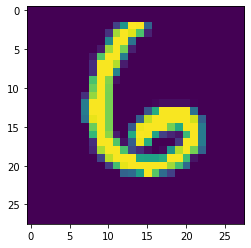

In [0]:
g = plt.imshow(x_train[0][:,:,0])

##**Build AlexNet with Keras**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

model = Sequential([
    Conv2D(filters = 64, input_shape=(28,28,1), kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(1,1), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),
    
    Conv2D(filters=192, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    BatchNormalization(),

    Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='valid'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2), strides=(1,1), padding='valid'),
    BatchNormalization(),
    
    Flatten(),
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(2048),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),

    Dense(800),
    Activation('relu'),
    Dropout(0.4),
    BatchNormalization(),
    
    Dense(10),
    Activation('softmax'),
])

Using TensorFlow backend.














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

###Epoch 50

In [0]:
model.fit(x_train, y_train, batch_size=200, validation_data=(x_val,y_val), epochs = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/50
37800/37800 [==============================] - 46s 1ms/step - loss: 0.1818 - acc: 0.9478 - val_loss: 0.4128 - val_acc: 0.9560
Epoch 2/50
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0647 - acc: 0.9811 - val_loss: 0.1393 - val_acc: 0.9788
Epoch 3/50
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0419 - acc: 0.9880 - val_loss: 0.0606 - val_acc: 0.9871
Epoch 4/50
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0346 - acc: 0.9904 - val_loss: 0.0739 - val_acc: 0.9850
Epoch 5/50
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0293 - acc: 0.9918 - val_loss: 0.0746 - val_acc: 0.9879
Epoch 6/50
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0233 - acc: 0.9938 - val_loss: 0.0439 - val_acc: 0.9900
Epoch 7/50
37800/37800 [=========

####Score (Epoch 50)

In [0]:
score = model.evaluate(x_val, y_val, batch_size=200)

print(score)

4200/4200 [==============================] - 1s 292us/step
[0.06900392418522945, 0.9923809596470424]


####**Test Data Prediction** (Epoch 50)



In [0]:
results = model.predict(test)
print(results)

[[2.04698733e-16 1.10567835e-17 1.00000000e+00 ... 1.15525864e-17
  2.15410511e-16 7.98400848e-18]
 [1.00000000e+00 1.51207155e-19 5.33444682e-18 ... 5.37985763e-17
  7.68895761e-19 4.49476038e-19]
 [4.52393911e-17 1.26757385e-18 4.49447362e-17 ... 1.01976546e-16
  4.25089937e-18 1.00000000e+00]
 ...
 [8.00710171e-17 2.18719387e-15 3.95782153e-16 ... 1.55274573e-16
  1.39934226e-15 2.04671715e-13]
 [2.37486625e-14 8.68871362e-16 2.52406056e-15 ... 4.24346329e-14
  3.63071144e-15 1.00000000e+00]
 [1.91480188e-19 5.39696899e-21 1.00000000e+00 ... 1.20334092e-20
  8.45143512e-19 2.22058837e-21]]


In [0]:
results = np.argmax(results, axis=1)
# select the indix with the maximum probability
results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_submission1.csv",index=False)

###**Epoch 100**

In [0]:
model.fit(x_train, y_train, batch_size=200, validation_data=(x_val,y_val), epochs = 100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 39s 1ms/step - loss: 0.1856 - acc: 0.9476 - val_loss: 0.3071 - val_acc: 0.9667
Epoch 2/100
37800/37800 [==============================] - 29s 761us/step - loss: 0.0624 - acc: 0.9821 - val_loss: 0.1723 - val_acc: 0.9752
Epoch 3/100
37800/37800 [==============================] - 29s 767us/step - loss: 0.0435 - acc: 0.9873 - val_loss: 0.1151 - val_acc: 0.9819
Epoch 4/100
37800/37800 [==============================] - 29s 776us/step - loss: 0.0370 - acc: 0.9896 - val_loss: 0.0633 - val_acc: 0.9867
Epoch 5/100
37800/37800 [==============================] - 30s 782us/step - loss: 0.0295 - acc: 0.9915 - val_loss: 0.0494 - val_acc: 0.9907
Epoch 6/100
37800/37800 [==============================] - 30s 788us/step - loss: 0.0232 - acc: 0.9935 - val_loss: 0.0555 - val_acc: 0.9900
Epoch 7/100
37800

####Score (Epoch 100)

In [0]:
score = model.evaluate(x_val, y_val, batch_size=200)

print(score)

4200/4200 [==============================] - 1s 216us/step
[0.07712003929468449, 0.9904761995588031]


####**Test Data Prediction** (Epoch 100)



In [0]:
results = model.predict(test)
print(results)

[[2.3709396e-20 1.2794652e-20 1.0000000e+00 ... 1.2129482e-23
  7.2937259e-23 2.8395107e-24]
 [1.0000000e+00 1.9818860e-20 1.8089456e-20 ... 4.9303344e-20
  2.7107145e-21 2.3031062e-23]
 [8.9939083e-17 4.0464803e-20 1.2343476e-19 ... 6.0496411e-23
  3.0663383e-21 1.0000000e+00]
 ...
 [4.4609324e-22 4.1087524e-24 1.5318981e-27 ... 5.4559007e-29
  8.4998992e-27 1.3489353e-24]
 [9.3393853e-17 5.7457923e-20 6.4250724e-20 ... 2.4320562e-22
  1.6537940e-20 1.0000000e+00]
 [8.4899120e-21 1.9978570e-20 1.0000000e+00 ... 1.4668606e-24
  3.4774524e-22 1.3510931e-24]]


In [0]:
results = np.argmax(results, axis=1)
# select the indix with the maximum probability
results = pd.Series(results,name="Label")

In [0]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_submission1.csv",index=False)